**NOMBRE:** Elizabeth Peredo

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import datetime
import locale
import math
from math import log, log10
from IPython.display import display, HTML
from tabulate import tabulate
import scipy.stats as ss
import plotly.express as px
import matplotlib.image as mpimg


In [219]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

url='https://drive.google.com/file/d/1HW5TL3yMuqnQUhZhCXWbMsJyQxctKEeu/view?usp=sharing'
file_id = url.split('/')[-2]

fileDownloaded = drive.CreateFile({'id':file_id})

fileDownloaded.GetContentFile('datos_facturas.csv')

df = pd.read_csv('datos_facturas.csv', delimiter=';')
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


In [221]:
df_new=df.copy()

In [222]:
df_new['IVA']= df["IVA"].str.replace(',', '.', case = False)
df_new['IVA'] = df_new['IVA'].astype(float)

df_new['total_pagado']= df["total_pagado"].str.replace(',', '.', case = False)
df_new['total_pagado'] = df_new['total_pagado'].astype(float)

df_new['fecha'] = pd.to_datetime(df['fecha'])

In [224]:
rango=df_new['total_pagado'].max()-df_new['total_pagado'].min()
intervalos=round(1+3.32*log10(df_new['total_pagado'].count()))
amplitud=rango/intervalos

df_new['total_pagado_range'] = pd.cut(df_new['total_pagado'], bins=intervalos, precision=0, include_lowest=True)
df_new.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado,total_pagado_range
0,1,2010-01-01,Enero,clienteA,si,100,normal,18,18.0,118.0,"(98.0, 133.0]"
1,2,2010-02-01,Enero,clienteB,no,150,normal,18,27.0,177.0,"(167.0, 202.0]"
2,3,2010-03-01,Enero,clienteC,si,75,normal,18,13.5,88.5,"(64.0, 98.0]"
3,4,2010-04-01,Enero,clienteD,si,200,normal,18,36.0,236.0,"(202.0, 236.0]"
4,5,2010-05-01,Enero,clienteA,no,125,normal,18,22.5,147.5,"(133.0, 167.0]"


In [225]:
#FRECUENCIA ABSOLUTA
data_total_pagado=df_new['total_pagado_range'].copy(deep='True')
df_total_pagado_range=pd.DataFrame(data_total_pagado)
df_total_pagado_range['ni']=df_new.groupby('total_pagado_range')['total_pagado_range'].transform('count')
df_total_pagado_range=df_total_pagado_range.drop_duplicates()

#FRECUENCIA RELATIVA
df_total_pagado_range['fi%'] = round(df_total_pagado_range.ni / df_total_pagado_range.ni.sum()* 100,2)
 
#FRECUENCIA ABSOLUTA ACUMULADA
df_total_pagado_range['Ni'] = round(df_total_pagado_range.ni.cumsum(),2)

#FRECUENCIA RELATIVA ACUMULADA
df_total_pagado_range['Fi%'] = round(df_total_pagado_range.ni.cumsum() / df_total_pagado_range.ni.sum()* 100,2)

df_total_pagado_range.head(intervalos)

,total_pagado_range,ni,fi%,Ni,Fi%
0,"(98.0, 133.0]",12,26.67,12,26.67
1,"(167.0, 202.0]",8,17.78,20,44.44
2,"(64.0, 98.0]",6,13.33,26,57.78
3,"(202.0, 236.0]",10,22.22,36,80.00
4,"(133.0, 167.0]",6,13.33,42,93.33
42,"(28.0, 64.0]",3,6.67,45,100.00


In [226]:
df_new["total_pagado"].describe()

count     45.000000
mean     147.308889
std       57.936116
min       29.500000
25%      108.000000
50%      135.000000
75%      189.000000
max      236.000000
Name: total_pagado, dtype: float64

# 1. Indica las medidas de centralización: media, mediana y moda. 

In [227]:
media = round(df_new["total_pagado"].mean(),2)
mediana = round(df_new["total_pagado"].median(),2)
moda = df_new["total_pagado"].mode().mean()

datos = {
    'Media' : [media],
    'Mediana': [mediana],
    'Moda': [moda]
}

df1 = pd.DataFrame(datos)
print(df1)

    Media  Mediana   Moda
0  147.31    135.0  177.0


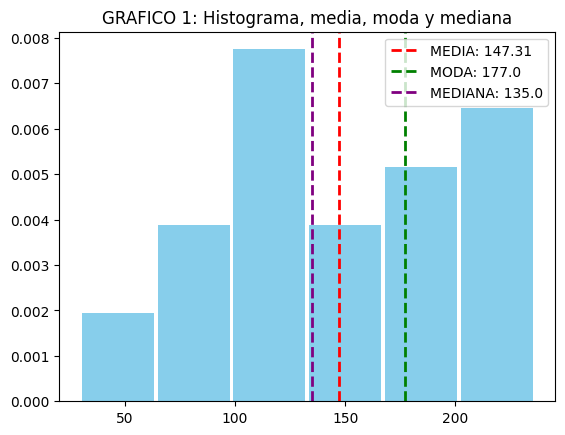

In [228]:
intervalos=round(1+3.32*log10(df_new['total_pagado'].count()))

plt.hist(df_new['total_pagado'], bins=intervalos, density=True, rwidth=0.95, color='skyblue')
plt.title("GRAFICO 1: Histograma, media, moda y mediana")  
plt.axvline(media, color='red', linestyle='dashed',  linewidth=2,label = "MEDIA: "+str(media))  
plt.axvline(moda, color='green', linestyle='dashed',  linewidth=2,label = "MODA: "+str(moda))  
plt.axvline(mediana, color='purple', linestyle='dashed',  linewidth=2,label = "MEDIANA: "+str(mediana))  
plt.legend(loc='upper right') 
plt.show()

**MEDIA:** 
En el GRAFICO 1 se observa que al calcular la media, se puede tener una idea general de la distribución de los datos y de cómo se concentran los valores en torno a un valor central, en este caso en especifico  la media se centra en 147.31. 

**MODA:**
La moda es una medida de tendencia central que se refiere al valor más frecuente en un conjunto de datos. En el GRAFICO 1, la moda es 177, este valor es cercano al valor máximo del total_pagado y es mayor a la media, ello evidencia un sesgo negativo.

**MEDIANA:**
Al hallar la mediana encuentramos la posición central dentro de una secuencia ascendente. En este caso, la mediana es 135, siendo este un valor menor de la media.

# 2. Indica las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación.

In [229]:
rango=df_new['total_pagado'].max()-df_new['total_pagado'].min()
varianza = df_new['total_pagado'].var()
desviacion = df_new["total_pagado"].std()
cof_var=ss.variation(df_new["total_pagado"])
cof_var1 = round(df_new["total_pagado"].std() / df_new["total_pagado"].mean(),4)


datos = {
    'Rango' : [rango],
    'Varianza': [varianza],
    'Desviación': [desviacion],
    'Coef Var': [str(cof_var1*100)+'%']
}

df2 = pd.DataFrame(datos)
#print(df2)
df2.head()

,Rango,Varianza,Desviación,Coef Var
0,206.5,3356.593556,57.936116,39.33%


- **RANGO:** El rango es una medida de la dispersión de un conjunto de datos y se calcula como la diferencia entre el valor máximo y el valor mínimo. En este caso, la amplitud de los valores de la muestra es de 206.5
- **VARIANZA:** La varianza es una medida de la variabilidad de un conjunto de datos en torno a su media. Se calcula como la suma de los cuadrados de las diferencias entre cada valor y la media, dividido por el número de valores menos uno. En este caso, la distancia que existe entre los valores de la serie total_pagado y la media es de 3,356.6
- **DESVIACIÓN:** La desviación estándar es la raíz cuadrada de la varianza y es una medida de la variabilidad de un conjunto de datos en torno a su media. Para este caso, la desviación es de 57.94 
- **COEFICIENTE DE VARIACIÓN:** Un coeficiente de variación del 39.33% significa que la desviación estándar es del 39% de la media. Esto indica un alto grado de variabilidad en los datos y sugiere que los valores están muy dispersos en torno a la media.

# 3. Indica las medidas de posición: rango intercuartílico, cuartil primero, decil 3 y percentil 90.

In [230]:
#Rango intercuantilico
q75, q25 = np.percentile(df_new['total_pagado'], [75, 25])
intercuartílico = q75 - q25

#Cuartil primero
cuartil1=df_new['total_pagado'].quantile(.25)

#Decil 3
decil3=df_new['total_pagado'].quantile(.3)

#Percentil 90
percentil90=df_new["total_pagado"].quantile(.9)

datos = {
    'Intercuartílico' : [intercuartílico],
    'Cuartil Primero': [cuartil1],
    'Decil 3': [decil3],
    'Percentil 90': [percentil90]
}

df3 = pd.DataFrame(datos)
#print(df3)
df3.head()

,Intercuartílico,Cuartil Primero,Decil 3,Percentil 90
0,81.0,108.0,118.0,236.0


- El **rango intercuartílico (RI)** es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos. Es una medida de la dispersión de los datos que es menos sensible a valores extremos que la desviación estándar o el rango. En este caso es 81

- El **cuartil primero (Q1)** es el valor que divide un conjunto de datos en cuatro partes iguales, con el 25% de los valores por debajo de él. En este caso es 108

- El **decil 3 (D3)** es el valor que divide un conjunto de datos en diez partes iguales, con el 30% de los valores por debajo de él. En este caso es 118

- El **percentil 90** es el valor que divide un conjunto de datos en cien partes iguales, con el 90% de los valores por debajo de él. En este caso es 236

# 4. Indica las medidas de concentración y forma: curtosis, asimetría y un gráfico.

In [231]:
print('Curtosis:', ss.kurtosis(df_new["total_pagado"]))
print('Asimetria:', ss.skew(df_new["total_pagado"]))

Curtosis: -0.8434624840832021
Asimetria: 0.09319685759185291


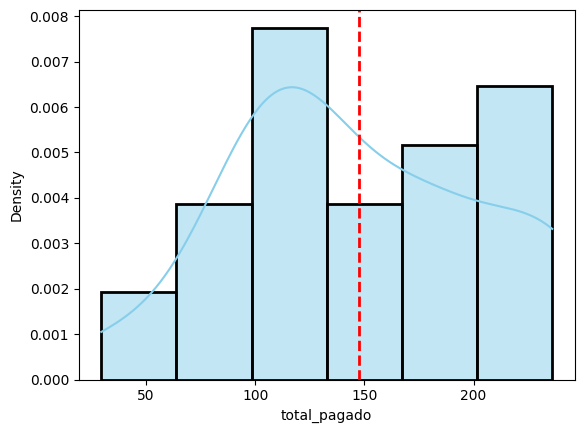

In [232]:
sns.set_palette('BrBG')
sns.histplot(df_new["total_pagado"], color='skyblue', 
            bins=intervalos, kde=True, 
            stat='density',linewidth=2)
plt.axvline(media, color='red', linestyle='dashed',  linewidth=2,label = "MEDIA: "+str(media))  
plt.show()

Una **curtosis** negativa de -0.84 y una **asimetria** ligeramente positivade 0.09 indican que la distribución es platicúrtica, con colas cortas, y que hay más datos concentrados en un lado de la distribución que en el otro.

# 5. Realiza un análisis con box-plot y sus medidas.

In [233]:
fig = px.box(df_new, x="cliente", y="total_pagado", color="factura_pagada")
fig.show()

El box-plot representa y comparara la distribución de un conjunto de datos, en este caso el total_pagado, cliente y mes. 
El gráfico precedente evidencia que el cliente A, es quien tiene una menor deuda, sin embargo, el cliente C es quien mayor facturas pagadas tiene.

# 6. Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.

In [234]:
df6=df_new.groupby(['cliente','factura_pagada'], as_index=False)['total_pagado'].sum()
df6.loc[df6['factura_pagada'] == 'si', 'SI'] = df6['total_pagado']
df6.loc[df6['factura_pagada'] == 'no', 'NO'] = -df6['total_pagado']

df6.fillna(0).head(8)

,cliente,factura_pagada,total_pagado,SI,NO
0,clienteA,no,565.0,0.0,-565.0
1,clienteA,si,1534.0,1534.0,0.0
2,clienteB,no,413.0,0.0,-413.0
3,clienteB,si,924.0,924.0,0.0
4,clienteC,no,570.0,0.0,-570.0
5,clienteC,si,584.5,584.5,0.0
6,clienteD,no,504.4,0.0,-504.4
7,clienteD,si,1534.0,1534.0,0.0


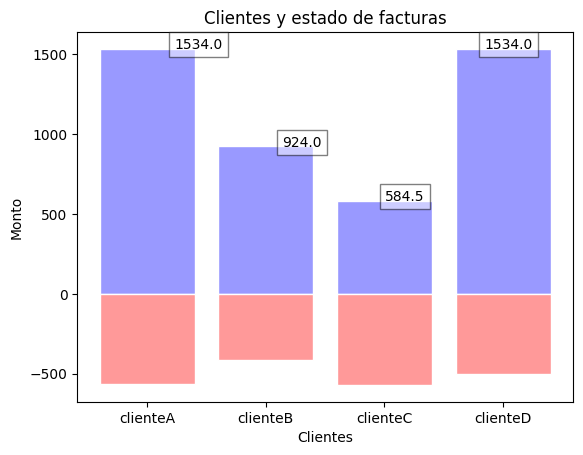

In [235]:
def addlabels(x,y):
    for i in range(0,len(x)):
        plt.text(i/2.3, y[i], y[i], ha='center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

plt.bar(df6['cliente'], df6['SI'], facecolor='#9999ff', edgecolor='white')
plt.bar(df6['cliente'], df6['NO'], facecolor='#ff9999', edgecolor='white')

plt.title("Clientes y estado de facturas")
plt.xlabel("Clientes")
plt.ylabel('Monto')

addlabels(df6['cliente'],df6['SI'])
#addlabels(df6['cliente'],df6['NO'])

plt.savefig('saved_figure.png', transparent=True)

El gráfico precedente evidencia que los clientes A y D son quienes han pagado más con un monto total de 1534 en comparación con los demás clientes.

# 7. ¿Quién es el cliente que más facturas no ha pagado en el mes de febrero?

In [236]:
df_new['total_deuda']=(df_new['importe_factura']+df_new['IVA'])-df_new['total_pagado']
df7=df_new.groupby(['cliente','factura_pagada','mes'], as_index=False)['total_pagado'].sum()
df7.loc[df7['factura_pagada'] == 'si', 'SI'] = df7['total_pagado']
df7.loc[df7['factura_pagada'] == 'no', 'NO'] = df7['total_pagado']
df7.fillna(0).head(8)

,cliente,factura_pagada,mes,total_pagado,SI,NO
0,clienteA,no,Enero,430.0,0.0,430.0
1,clienteA,no,Febrero,135.0,0.0,135.0
2,clienteA,si,Enero,1003.0,1003.0,0.0
3,clienteA,si,Febrero,531.0,531.0,0.0
4,clienteB,no,Enero,354.0,0.0,354.0
5,clienteB,no,Febrero,59.0,0.0,59.0
6,clienteB,si,Enero,688.0,688.0,0.0
7,clienteB,si,Febrero,236.0,236.0,0.0


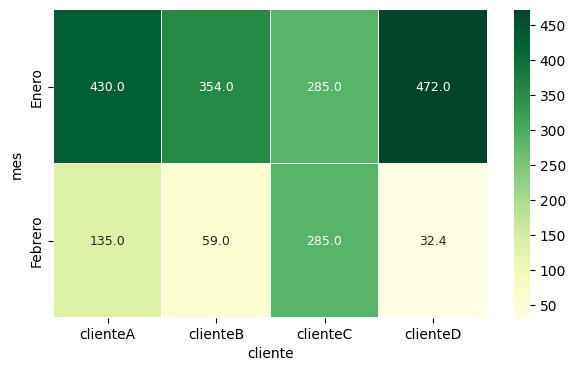

In [237]:
df7_=pd.pivot_table(df7, 
                   index= ['mes'],
                   columns = ['cliente'], 
                   values='NO',
                   aggfunc='sum').fillna(0);

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.heatmap(df7_, annot=True,cmap='YlGn',annot_kws = {'size': 9},linewidths=.1, fmt=".1f")

En el gráfico de calor precedente se observa que el cliente C en el mes de febrero fue quien tiene una mayor deuda de 285 en comparación con los demás clientes.

# 8. Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.

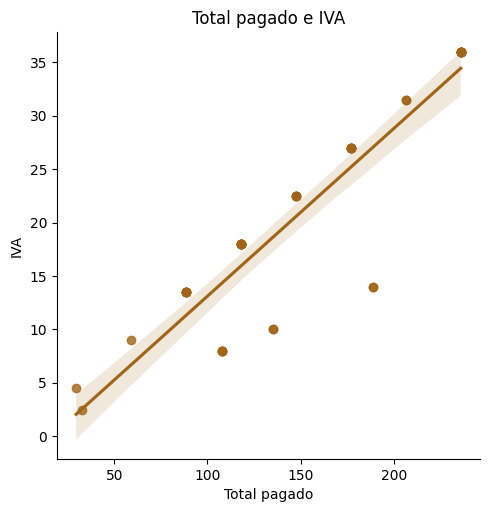

In [238]:
sns.lmplot(x='total_pagado',y='IVA',data=df_new)
plt.xlabel('Total pagado')
plt.ylabel('IVA')
plt.title('Total pagado e IVA')
plt.show()

El gráfico precedente evidencia que mientras sea mayor el total_pagado, mayor será el IVA, lo que evidencia que ambas variables son dependientes, teniendo una relación directa.

# 9. Determina el valor de la covarianza de ambas variables. 

In [239]:
cov = df_new[['total_pagado','IVA']].cov()
cov

,total_pagado,IVA
total_pagado,3356.593556,526.768808
IVA,526.768808,100.529919


La covarianza es una medida que indica la relación lineal entre dos variables. La covarianza de las variables total_pagado e IVA es positiva, lo que evidencia que tienen una relación lineal.